Song Recommendation Model

In [1]:
# basic 
import pandas as pd
import numpy as np

# visualizaton
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Clustering model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('data/genres_v2.csv')
df.head()

/tmp/ipykernel_69407/2247330132.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/genres_v2.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [3]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
df[df['song_name'].isnull()]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
18597,0.714,0.821,6,-7.635,1,0.1760,0.041000,0.000000,0.1160,0.649,...,69gRFGOWY9OMpFJgFol1u0,spotify:track:69gRFGOWY9OMpFJgFol1u0,https://api.spotify.com/v1/tracks/69gRFGOWY9OM...,https://api.spotify.com/v1/audio-analysis/69gR...,282707,4,Hiphop,NaN,NaN,NaN
19677,0.811,0.445,8,-10.105,1,0.2740,0.045300,0.000000,0.1090,0.250,...,13q8un4Xjs3IOfdem4jgVe,spotify:track:13q8un4Xjs3IOfdem4jgVe,https://api.spotify.com/v1/tracks/13q8un4Xjs3I...,https://api.spotify.com/v1/audio-analysis/13q8...,154082,4,Hiphop,NaN,NaN,NaN
19678,0.763,0.654,11,-9.423,0,0.5060,0.087500,0.000003,0.1390,0.277,...,7B2NTZXEPeshkufbqT1gMN,spotify:track:7B2NTZXEPeshkufbqT1gMN,https://api.spotify.com/v1/tracks/7B2NTZXEPesh...,https://api.spotify.com/v1/audio-analysis/7B2N...,160522,4,Hiphop,NaN,NaN,NaN
19679,0.759,0.530,9,-8.897,1,0.2880,0.004940,0.000000,0.1960,0.329,...,5BtGgEaMNYuXfK69d9FJDs,spotify:track:5BtGgEaMNYuXfK69d9FJDs,https://api.spotify.com/v1/tracks/5BtGgEaMNYuX...,https://api.spotify.com/v1/audio-analysis/5BtG...,197303,4,Hiphop,NaN,NaN,NaN
19680,0.535,0.427,10,-9.658,0,0.0512,0.139000,0.001290,0.1100,0.195,...,7euujXy941mB6TL7uANTxz,spotify:track:7euujXy941mB6TL7uANTxz,https://api.spotify.com/v1/tracks/7euujXy941mB...,https://api.spotify.com/v1/audio-analysis/7euu...,121887,3,Hiphop,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.394,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.383,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.124,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.488,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [6]:
# dropping rows with no song names and uri
df = df.dropna(subset=['song_name', 'uri'])

# dropping duplicate columns
df = df.drop_duplicates(subset=['song_name', 'uri'])

df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,0.526,0.819,7,-6.728,1,0.2980,0.00206,0.000003,0.3360,0.5810,...,54v6Kv41W8AKToCb14PmJD,spotify:track:54v6Kv41W8AKToCb14PmJD,https://api.spotify.com/v1/tracks/54v6Kv41W8AK...,https://api.spotify.com/v1/audio-analysis/54v6...,281886,4,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",NaN,NaN
21520,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,...,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,Hiphop,Daddy's Girl,NaN,NaN
21521,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,...,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,Hiphop,'94,NaN,NaN
21522,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,...,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,Hiphop,Born 2 Live,NaN,NaN


EDA

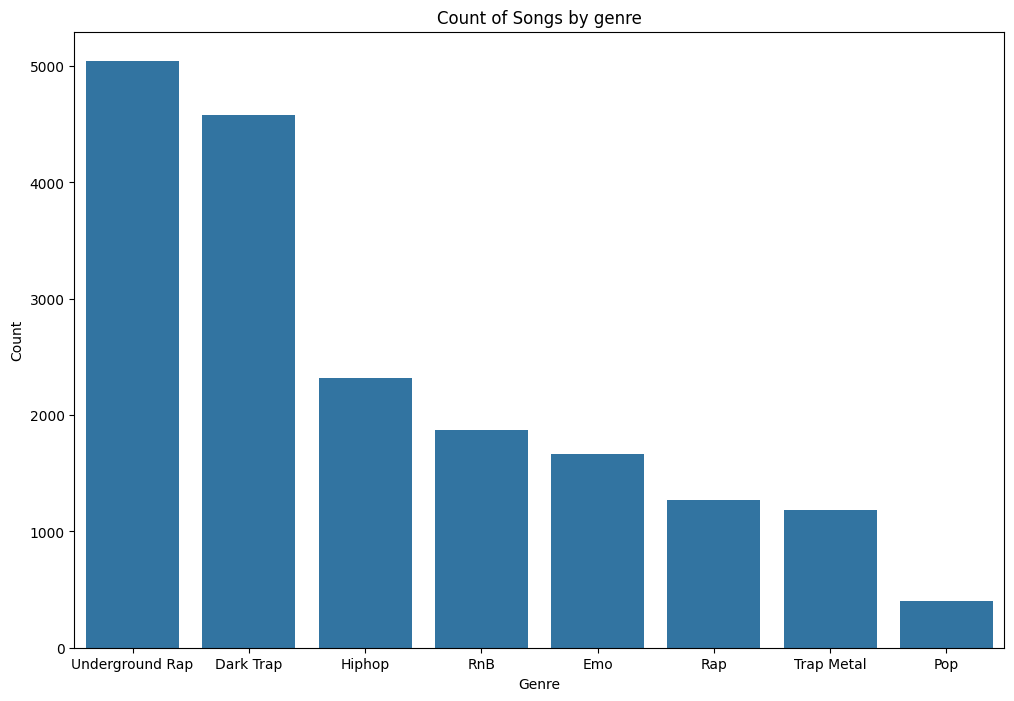

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# count of songs by genre
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index)

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Songs by genre')
plt.show()

In [8]:
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'uri', 'genre', 'song_name']
filtered_df = df[cols]
filtered_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,0.526,0.819,7,-6.728,1,0.2980,0.00206,0.000003,0.3360,0.5810,159.910,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &..."
21520,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,160.299,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl
21521,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,154.272,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94
21522,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,184.160,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live


In [9]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18352 entries, 0 to 21523
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      18352 non-null  float64
 1   energy            18352 non-null  float64
 2   key               18352 non-null  int64  
 3   loudness          18352 non-null  float64
 4   mode              18352 non-null  int64  
 5   speechiness       18352 non-null  float64
 6   acousticness      18352 non-null  float64
 7   instrumentalness  18352 non-null  float64
 8   liveness          18352 non-null  float64
 9   valence           18352 non-null  float64
 10  tempo             18352 non-null  float64
 11  uri               18352 non-null  object 
 12  genre             18352 non-null  object 
 13  song_name         18352 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


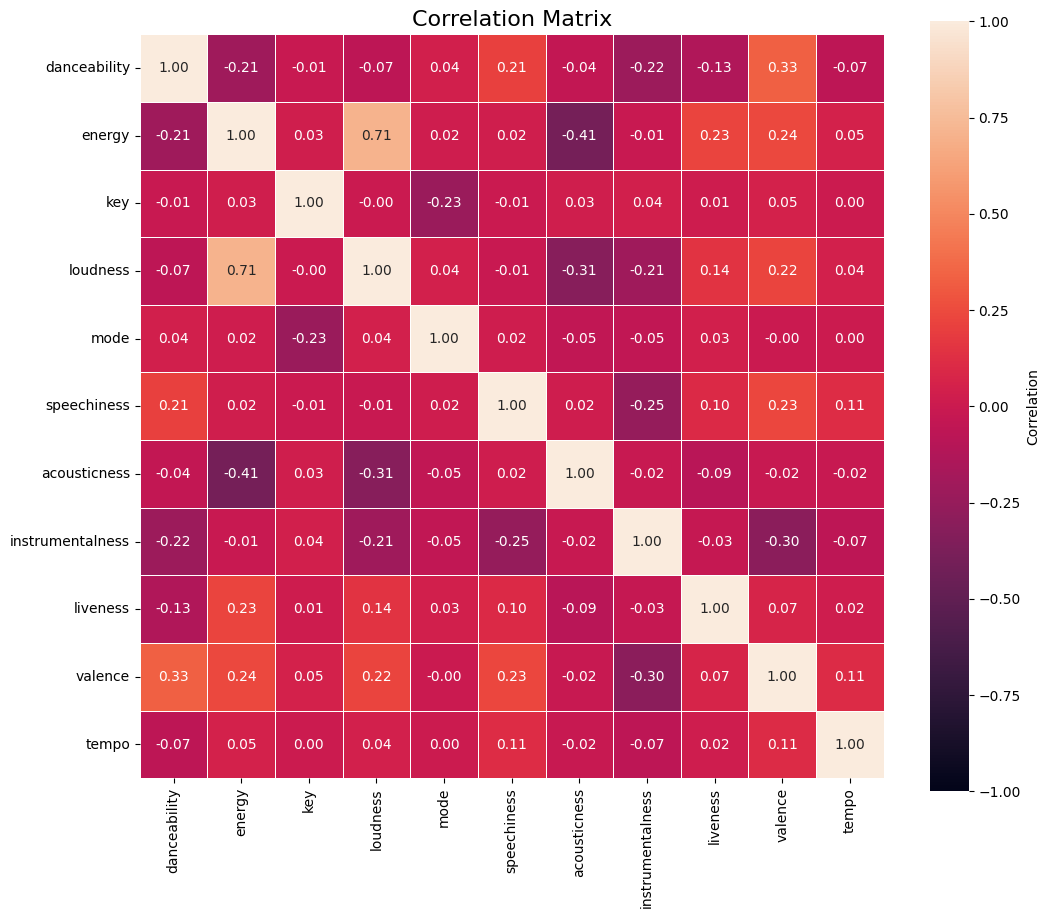

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only the data with numeric values
numeric_df = filtered_df.select_dtypes(include=['float64', 'int64'])

# correlation matrix
correlation_matrix = numeric_df.corr()

# plotting the matrix
plt.figure(figsize = (12,10))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidth=0.5, 
            vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'}, 
            annot_kws={"size": 10}, square=True)

plt.title('Correlation Matrix', fontsize=16)
plt.show()

K Means Clustering

In [11]:
num_cols = [i for i in filtered_df.columns if filtered_df[i].dtype != 'object']
scaler = StandardScaler()

filtered_df[num_cols] = scaler.fit_transform(filtered_df[num_cols])
filtered_df

/tmp/ipykernel_69407/2065314466.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[num_cols] = scaler.fit_transform(filtered_df[num_cols])


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name
0,1.020577,0.868988,-0.856638,-0.096101,0.854028,1.734850,-0.515983,-0.302673,-0.921993,-0.127645,0.159685,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde
1,0.329285,-0.932612,0.773751,-0.050914,0.854028,-0.680405,1.095488,-0.360457,-0.508370,-1.257259,-1.285537,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology
2,1.137849,1.312372,-0.041444,0.774257,0.854028,-0.801664,-0.733239,-0.360440,1.175288,-1.619161,2.265699,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote
3,-1.170570,0.683777,-1.400101,0.798873,0.854028,-0.513053,-0.686482,-0.360457,-0.534884,-1.039861,1.193051,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.816892,-0.197380,-0.856638,-0.198615,0.854028,0.834271,0.226465,-0.360457,-0.190198,0.733419,-0.150604,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,-0.861958,0.897050,0.502019,0.118369,0.854028,0.869727,-0.788686,-0.360443,0.936660,0.690793,0.260563,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &..."
21520,-0.787891,0.897050,-1.128370,0.100834,0.854028,2.068136,-0.758081,-0.360457,-0.422198,-0.711634,0.273978,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl
21521,-1.547077,-0.623927,0.502019,-0.500424,0.854028,0.777541,0.259525,-0.360457,-0.481855,0.464870,0.066119,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94
21522,0.736653,-0.062681,0.502019,0.058007,0.854028,0.734994,-0.724265,-0.351919,-0.627684,0.371090,1.096898,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live


/tmp/ipykernel_69407/1353727125.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_wto_pca['cluster'] = kmeans.fit_predict(X)


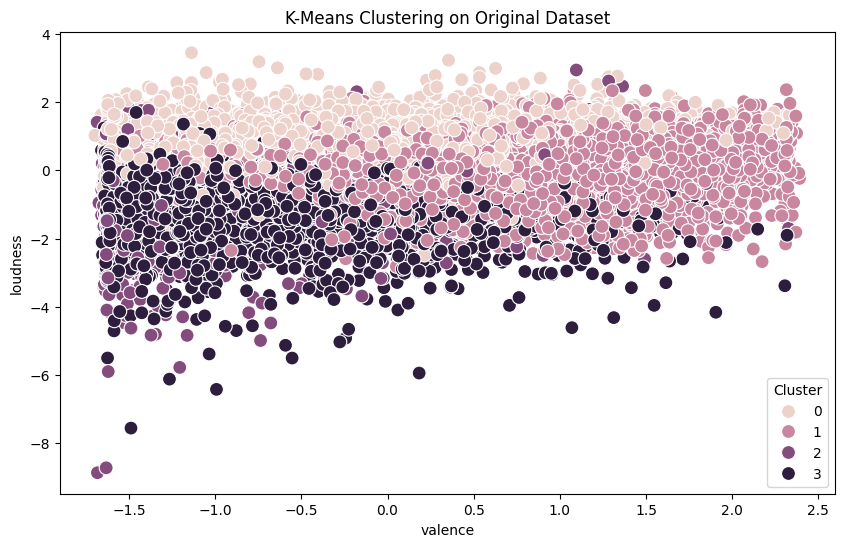

In [12]:
X = filtered_df.drop(['uri', 'genre', 'song_name'], axis=1)

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

filtered_df_wto_pca = filtered_df
filtered_df_wto_pca['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='loudness', hue='cluster', 
                data=filtered_df_wto_pca, s=100)
plt.title('K-Means Clustering on Original Dataset')
plt.xlabel('valence')
plt.ylabel('loudness')
plt.legend(title='Cluster')
plt.show()

Clustering with PCA & KMeans

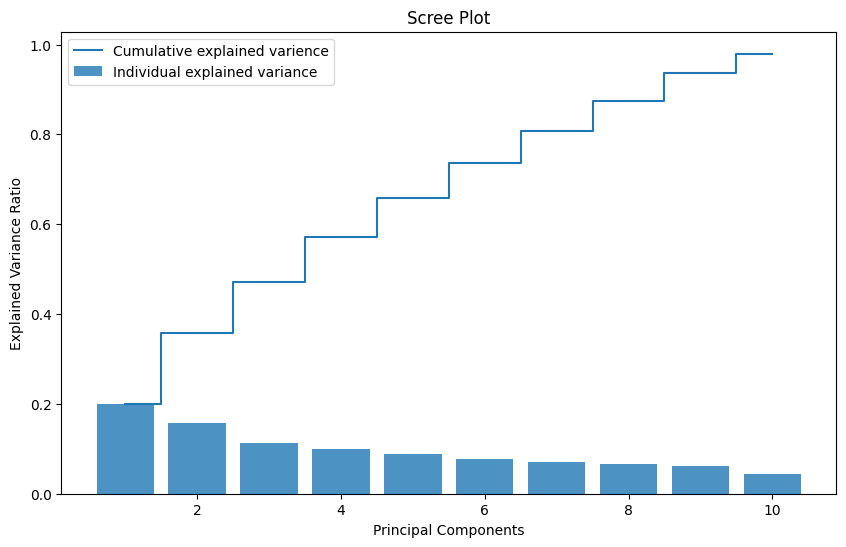

In [13]:
n_components = 10
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(filtered_df[num_cols])

# Scree plot
explained_varience_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_varience_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_varience_ratio, 
        alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(1, n_components + 1), cumulative_explained_variance,
         where='mid', label='Cumulative explained varience')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.show()

In [14]:
# Perform PCA
n_components = 4
pca = PCA(n_components=n_components)
pca_df = pca.fit_transform(filtered_df[num_cols])
pca_df

array([[ 0.74729341,  1.23863762, -1.23011329, -0.19451128],
       [-1.5678939 , -0.0729223 , -0.32552114, -0.87823353],
       [ 1.44584131, -0.74249617, -0.74215366,  1.01669114],
       ...,
       [-0.44862149,  0.23462046, -0.07725616,  0.91485627],
       [ 0.58530391,  1.08221556, -0.21588203,  0.10470561],
       [ 1.18116072,  0.88273037,  0.73865583,  0.21430425]],
      shape=(18352, 4))

/tmp/ipykernel_69407/3290329809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_pca['cluster'] = kmeans.fit_predict(pca_result)


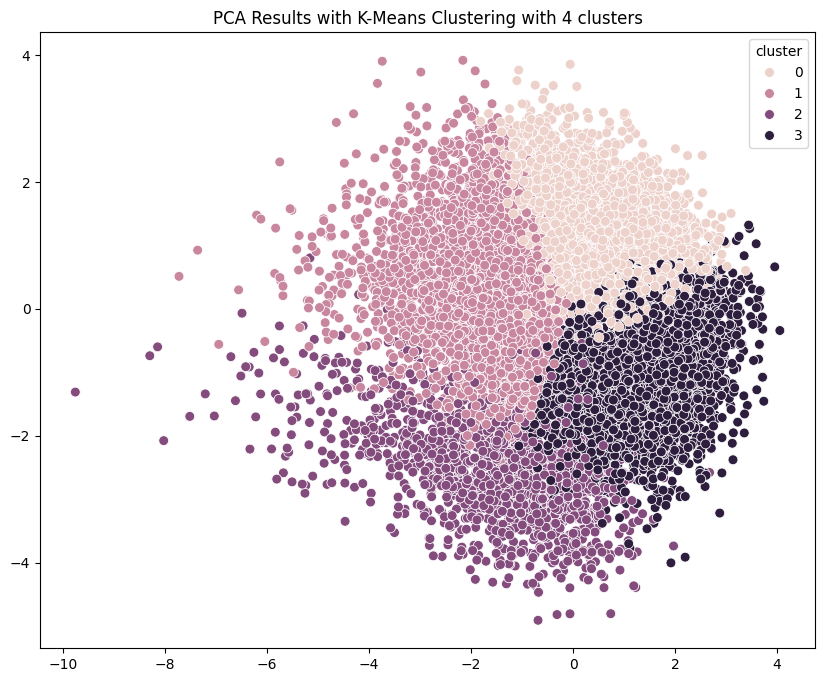

In [15]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
filtered_df_pca = filtered_df
filtered_df_pca['cluster'] = kmeans.fit_predict(pca_result)

# Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], 
                hue=filtered_df_pca['cluster'], s=50)
plt.title(f'PCA Results with K-Means Clustering with {n_clusters} clusters')
plt.show()

In [16]:
filtered_df_pca

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name,cluster
0,1.020577,0.868988,-0.856638,-0.096101,0.854028,1.734850,-0.515983,-0.302673,-0.921993,-0.127645,0.159685,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,0
1,0.329285,-0.932612,0.773751,-0.050914,0.854028,-0.680405,1.095488,-0.360457,-0.508370,-1.257259,-1.285537,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology,1
2,1.137849,1.312372,-0.041444,0.774257,0.854028,-0.801664,-0.733239,-0.360440,1.175288,-1.619161,2.265699,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote,3
3,-1.170570,0.683777,-1.400101,0.798873,0.854028,-0.513053,-0.686482,-0.360457,-0.534884,-1.039861,1.193051,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),3
4,0.816892,-0.197380,-0.856638,-0.198615,0.854028,0.834271,0.226465,-0.360457,-0.190198,0.733419,-0.150604,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,-0.861958,0.897050,0.502019,0.118369,0.854028,0.869727,-0.788686,-0.360443,0.936660,0.690793,0.260563,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",3
21520,-0.787891,0.897050,-1.128370,0.100834,0.854028,2.068136,-0.758081,-0.360457,-0.422198,-0.711634,0.273978,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl,3
21521,-1.547077,-0.623927,0.502019,-0.500424,0.854028,0.777541,0.259525,-0.360457,-0.481855,0.464870,0.066119,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94,1
21522,0.736653,-0.062681,0.502019,0.058007,0.854028,0.734994,-0.724265,-0.351919,-0.627684,0.371090,1.096898,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live,0


EDA on clusters and assigning them moods

In [17]:
filtered_df_pca['cluster'].value_counts()

cluster
0    6654
3    5294
1    4760
2    1644
Name: count, dtype: int64

/tmp/ipykernel_69407/2154116292.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)
/tmp/ipykernel_69407/2154116292.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)
/tmp/ipykernel_69407/2154116292.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)
/tmp/ipykernel_69407/2154116292.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)


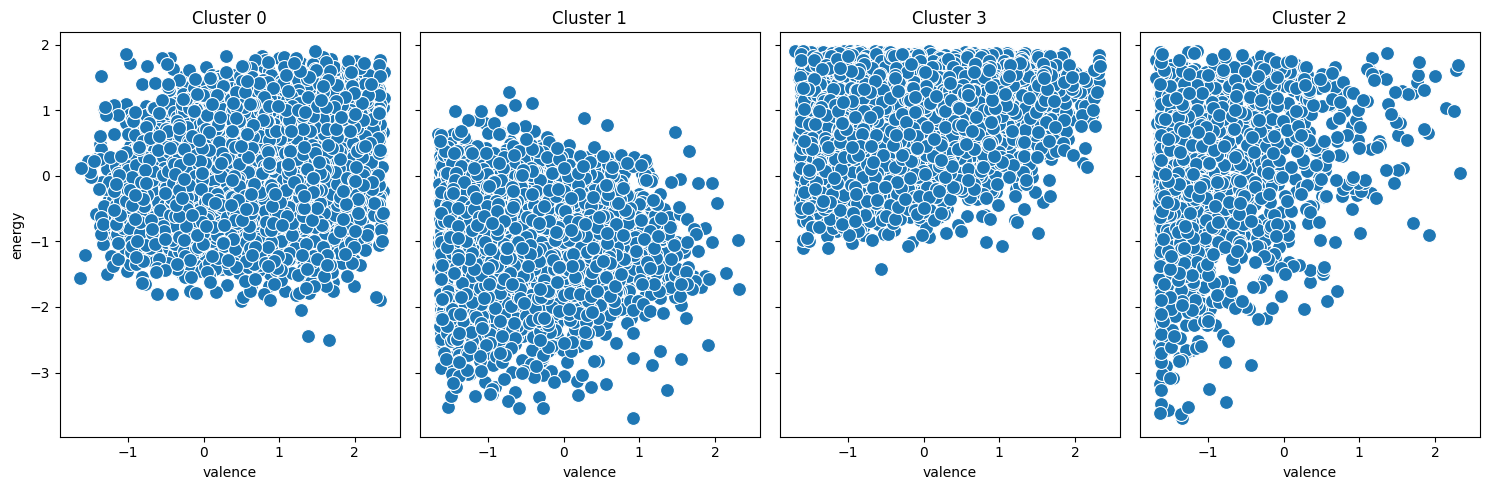

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

clusters = filtered_df_pca['cluster'].unique()

fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(15, 5), sharex=True, sharey=True)

# plotting each cluster
for i, cluster in enumerate(clusters):
    cluster_data = filtered_df_pca[filtered_df_pca['cluster'] == cluster]
    ax = axes[i]
    sns.scatterplot(x='valence', y='energy', data=cluster_data, s=100, ax=ax)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('valence')
    ax.set_ylabel('energy')
    ax.legend().set_visible(False)

plt.tight_layout()
plt.show()

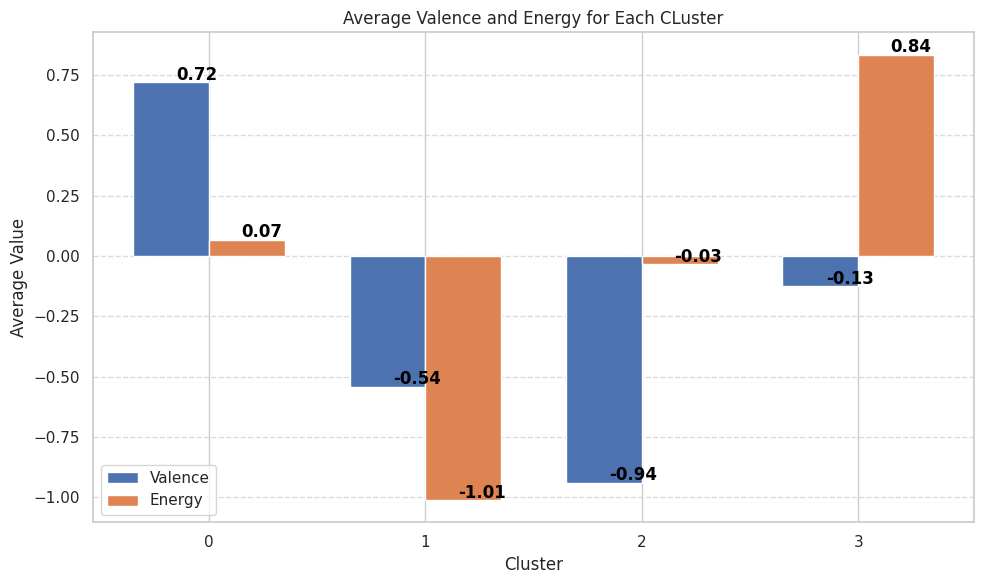

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# group by 'clusters' and calculate the mean for 'valence' and 'energy'
cluster_means = filtered_df_pca.groupby('cluster')[['valence', 'energy']].mean().reset_index()

# Plotting the average 'valence' and 'energy' for each cluster
bar_width = 0.35
index = cluster_means['cluster']

plt.figure(figsize=(10, 6))

plt.bar(index - bar_width/2, cluster_means['valence'], bar_width, label='Valence')
plt.bar(index + bar_width/2, cluster_means['energy'], bar_width, label='Energy')

# Displaying values on top of each bar
for i, valence, energy in zip(index, cluster_means['valence'], cluster_means['energy']):
    plt.text(i - 0.15, valence + 0.01, f'{valence:.2f}', color='black', fontweight='bold')
    plt.text(i + 0.15, energy + 0.01, f'{energy:.2f}', color='black', fontweight='bold')

plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.title('Average Valence and Energy for Each CLuster')
plt.xticks(index, cluster_means['cluster'])
plt.legend()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [20]:
#Label each cluster with specific mood
mood_map = {
    0: 'Sad',
    1: 'Calm',
    2: 'Angry',
    3: 'Happy'
}

# Apply mood based on cluster
filtered_df_pca['mood'] = filtered_df_pca['cluster'].map(mood_map)

filtered_df_pca

/tmp/ipykernel_69407/1909302601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_pca['mood'] = filtered_df_pca['cluster'].map(mood_map)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name,cluster,mood
0,1.020577,0.868988,-0.856638,-0.096101,0.854028,1.734850,-0.515983,-0.302673,-0.921993,-0.127645,0.159685,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,0,Sad
1,0.329285,-0.932612,0.773751,-0.050914,0.854028,-0.680405,1.095488,-0.360457,-0.508370,-1.257259,-1.285537,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology,1,Calm
2,1.137849,1.312372,-0.041444,0.774257,0.854028,-0.801664,-0.733239,-0.360440,1.175288,-1.619161,2.265699,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote,3,Happy
3,-1.170570,0.683777,-1.400101,0.798873,0.854028,-0.513053,-0.686482,-0.360457,-0.534884,-1.039861,1.193051,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),3,Happy
4,0.816892,-0.197380,-0.856638,-0.198615,0.854028,0.834271,0.226465,-0.360457,-0.190198,0.733419,-0.150604,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,0,Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,-0.861958,0.897050,0.502019,0.118369,0.854028,0.869727,-0.788686,-0.360443,0.936660,0.690793,0.260563,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",3,Happy
21520,-0.787891,0.897050,-1.128370,0.100834,0.854028,2.068136,-0.758081,-0.360457,-0.422198,-0.711634,0.273978,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl,3,Happy
21521,-1.547077,-0.623927,0.502019,-0.500424,0.854028,0.777541,0.259525,-0.360457,-0.481855,0.464870,0.066119,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94,1,Calm
21522,0.736653,-0.062681,0.502019,0.058007,0.854028,0.734994,-0.724265,-0.351919,-0.627684,0.371090,1.096898,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live,0,Sad


EDA on the moods

1, Numbers of songs for each mood

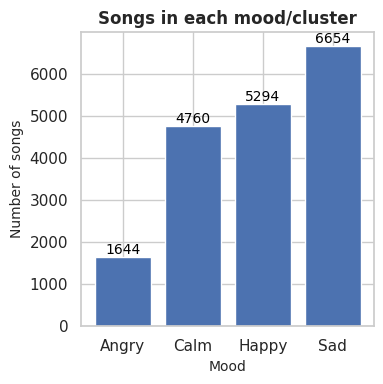

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_counts = filtered_df_pca['mood'].value_counts().sort_values()

plt.figure(figsize=(4,4))
bars = plt.bar(cluster_counts.index, cluster_counts.values)

plt.title('Songs in each mood/cluster', fontsize=12, fontweight= 'bold')
plt.xlabel('Mood', fontsize=10)
plt.ylabel('Number of songs', fontsize=10)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(cluster_counts.index)
plt.tight_layout()
plt.show()

2. Count of songs of all genres in each mood

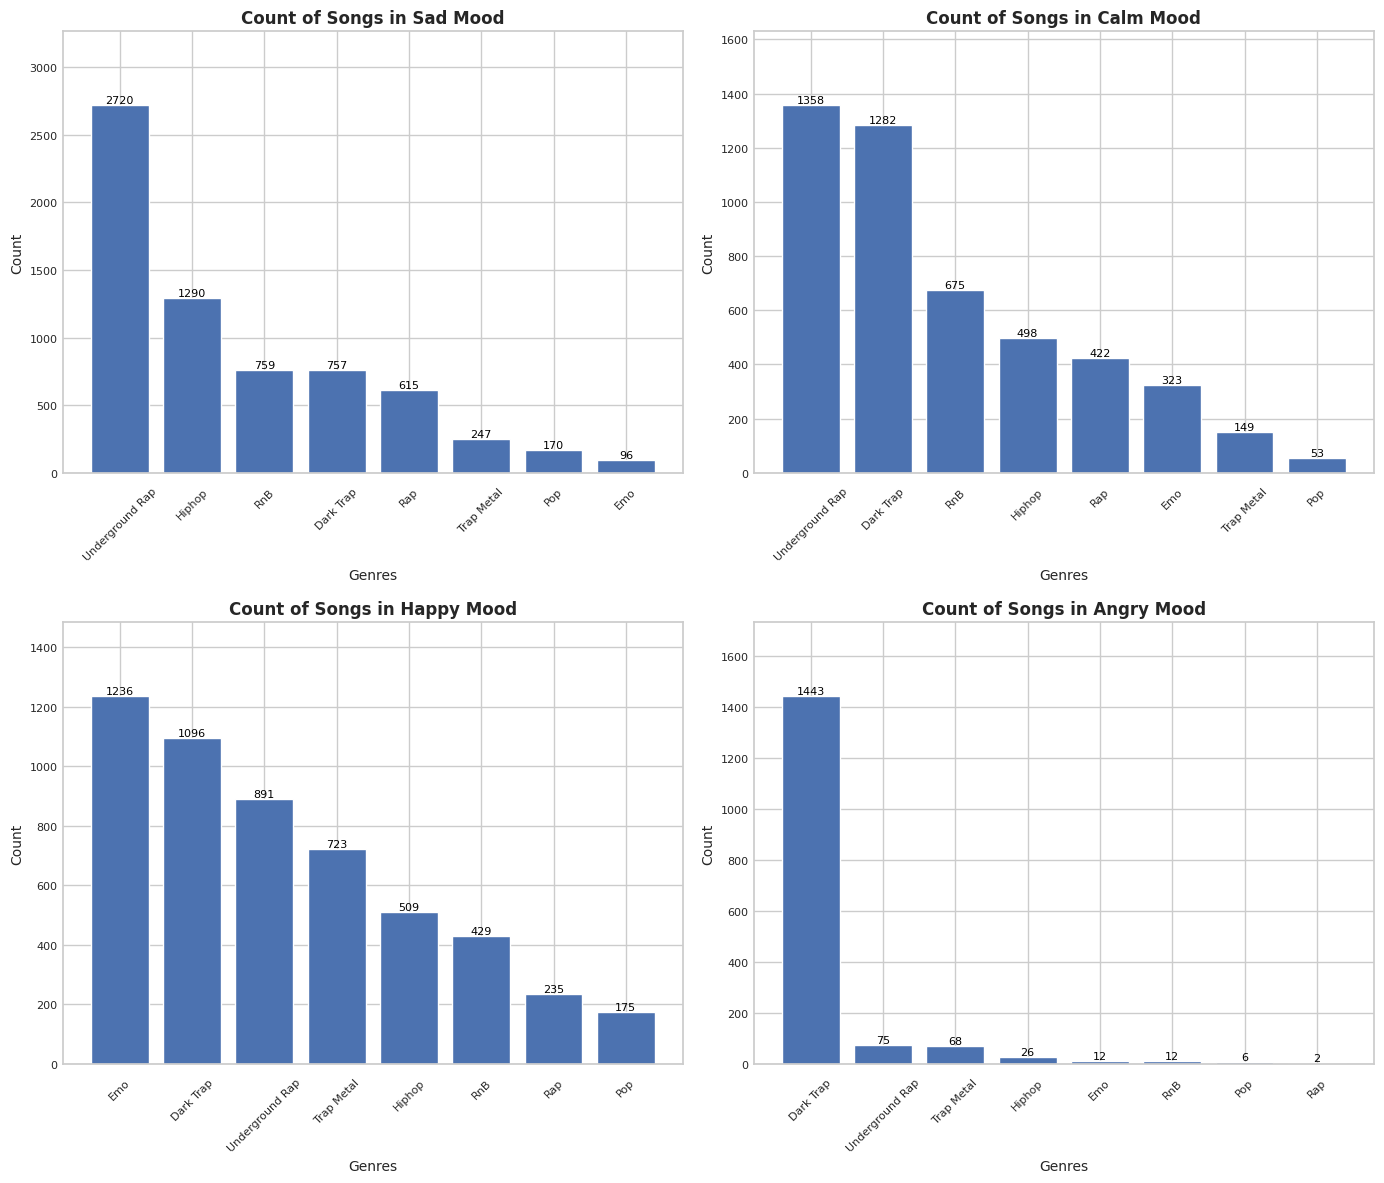

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

unique_moods = filtered_df_pca['mood'].unique()
unique_genres = filtered_df_pca['genre'].unique()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

for i, mood in enumerate(unique_moods):
    row = i // 2
    col = i % 2

    mood_data = filtered_df_pca[filtered_df_pca['mood'] == mood]
    genre_counts = mood_data['genre'].value_counts()

    bars = axes[row, col].bar(genre_counts.index, genre_counts.values)

    axes[row, col].set_title(f'Count of Songs in {mood} Mood', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Genres', fontsize=10)
    axes[row, col].set_ylabel('Count', fontsize=10)
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=8)
    axes[row, col].tick_params(axis='y', labelsize=8)
    axes[row, col].tick_params(axis='y', which='both', length=0)
    axes[row, col].set_ylim(0, genre_counts.max() * 1.2)

        # Display count values above each bar
    for bar in bars:
        yval = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=8, color='black')

# Adjust layout
plt.tight_layout()
plt.show()

3. Percentage of songs per genre in each mood

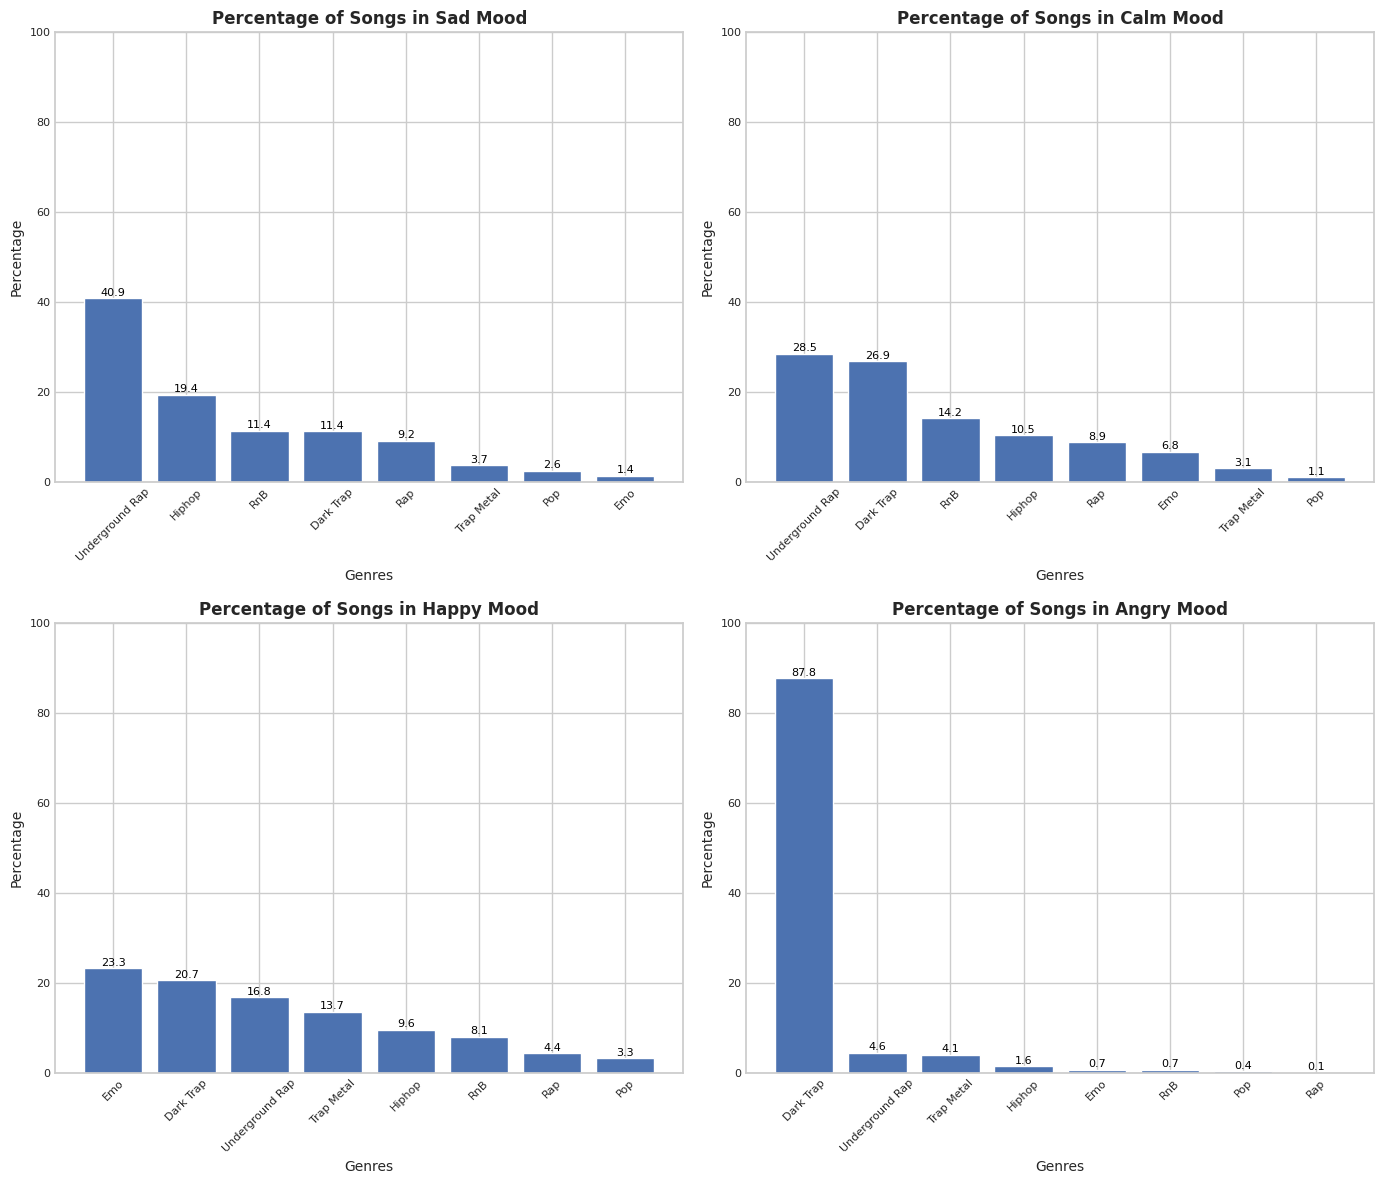

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

unique_moods = filtered_df_pca['mood'].unique()
unique_genres = filtered_df_pca['genre'].unique()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

for i, mood in enumerate(unique_moods):
    row = i // 2
    col = i % 2

    mood_data = filtered_df_pca[filtered_df_pca['mood'] == mood]
    genre_count = mood_data['genre'].value_counts()

    bars = axes[row, col].bar(genre_count.index, genre_count.values / genre_count.sum() * 100)

    axes[row, col].set_title(f'Percentage of Songs in {mood} Mood', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Genres', fontsize=10)
    axes[row, col].set_ylabel('Percentage', fontsize=10)
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=8)
    axes[row, col].tick_params(axis='y', labelsize=8)
    axes[row, col].tick_params(axis='both', which='both', length=0)
    axes[row, col].set_ylim(0, 100)

        # Display count values above each bar
    for bar in bars:
        yval = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=8, color='black')

# Adjust layout
plt.tight_layout()
plt.show()


Recommendation based on mood

In [24]:
user_mood = np.random.choice(['Happy', 'Sad', 'Angry', 'Sad'])

filtered_by_mood = filtered_df_pca[filtered_df_pca['mood'] == user_mood]

random_songs = filtered_by_mood.sample(5)['song_name']

print("User is feeling:", user_mood)
print("Songs based on detected mood:")
print(random_songs)


User is feeling: Sad
Songs based on detected mood:
20672    Do Ya Thing (feat. Young Dro)
16406                 heartbreak hotel
11779                    WISH ME DEATH
10354                         Dios Mio
6484                           Dracula
Name: song_name, dtype: object


Exporting the filtered dataframe

In [25]:
import pandas as pd

filtered_df_pca.to_pickle("clustered_df.pkl")